In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib
import matplotlib.pyplot as plt
import torch

import tensorcraft as tc

matplotlib.rcParams["figure.dpi"] = 200

In [2]:
LATEX_WIDTH = 347.12354  # Doc
# LATEX_WIDTH = 444.14774 # Doc

figSize = tc.viz.latex2figSize(LATEX_WIDTH, fraction=1, ratio=1)
fontsize = 10
fontsize_small = 8

matplotlib.rcParams.update(
    {
        "figure.figsize": figSize,
        "figure.dpi": 100,
        # "figure.autolayout": True,
        "text.usetex": True,
        "font.family": "serif",
        "font.size": fontsize,
        "axes.labelsize": fontsize_small,
        "legend.fontsize": fontsize_small,
        "xtick.labelsize": fontsize_small,
        "ytick.labelsize": fontsize_small,
    }
)

In [3]:
import networkx as nx

graph = nx.grid_graph(dim=(5, 2))
graph.nodes()

NodeView(((0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4)))

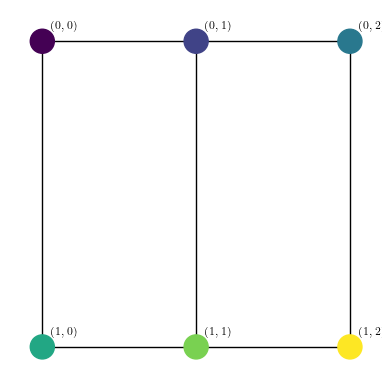

In [4]:
mesh = torch.Size((2, 3))
fig = plt.figure()
tc.viz.draw_2d_mesh(fig.add_subplot(111), mesh)

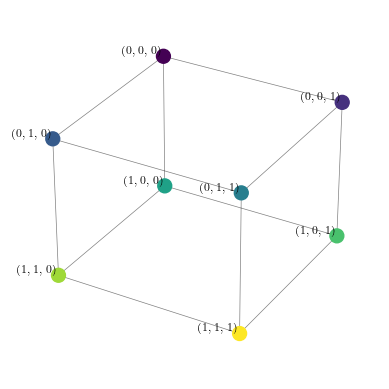

In [5]:
fig = plt.figure()
mesh = torch.Size((2, 2, 2))

tc.viz.draw_3d_mesh(fig.add_subplot(111, projection="3d"), mesh)

subplot_x: 2, subplot_y: 3
[[<Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: >]]
p_midx: (0, 0), p: 0, subplot: (0, tensor(0))
p_midx: (0, 1), p: 1, subplot: (0, tensor(1))
p_midx: (0, 2), p: 2, subplot: (0, tensor(2))
p_midx: (1, 0), p: 3, subplot: (1, tensor(0))
p_midx: (1, 1), p: 4, subplot: (1, tensor(1))
p_midx: (1, 2), p: 5, subplot: (1, tensor(2))


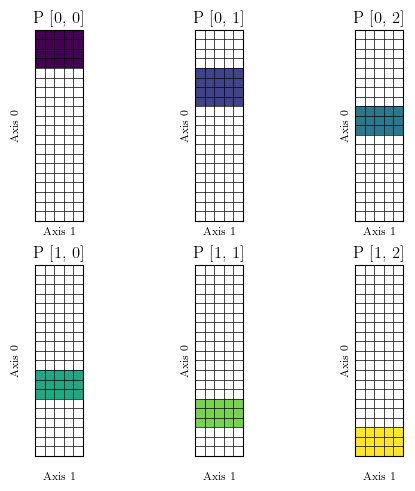

In [24]:
import math

mesh = torch.Size((2,3))
d = tc.dist.SlabDist(mesh, 0, 0)
tensor_shape = torch.Size((20, 5))

subplot_x = mesh[0]
subplot_y = math.prod(mesh[1:]) if len(mesh) > 1 else 1

fig = plt.figure(layout="constrained")
gs = fig.add_gridspec(nrows=subplot_x, ncols=subplot_y)
axs = gs.subplots(
    sharex=True,
    sharey=True,
)

print(f"subplot_x: {subplot_x}, subplot_y: {subplot_y}")
print(axs)

for p in range(d.numProcessors):
    p_midx = d.getProcessorMultiIndex(p)

    y_idx = tc.multi2linearIndex(mesh[1:], p_midx[1:]) if len(mesh) > 1 else 0
    print(f"p_midx: {p_midx}, p: {p}, subplot: {p_midx[0], y_idx}")
    if subplot_y == 1:
        tc.viz.draw_2d_processor_view(axs[p_midx[0]], tensor_shape, d, p)
    else:
        tc.viz.draw_2d_processor_view(axs[p_midx[0], y_idx], tensor_shape, d, p)

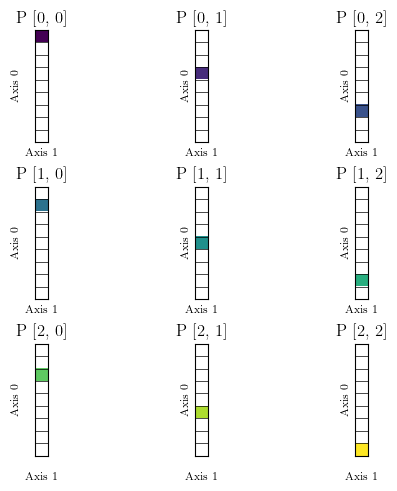

In [7]:
import math

mesh = torch.Size((3, 3))
d = tc.dist.MultiAxisDist(mesh, ((1,0),()), (1,1))
tensor_shape = torch.Size((9,1))

subplot_x = mesh[0]
subplot_y = math.prod(mesh[1:]) if len(mesh) > 1 else 1

fig = plt.figure(layout="constrained")
gs = fig.add_gridspec(nrows=subplot_x, ncols=subplot_y)
axs = gs.subplots(
    sharex=True,
    sharey=True,
)

# print(f"subplot_x: {subplot_x}, subplot_y: {subplot_y}")

for p in range(d.numProcessors):
    p_midx = d.getProcessorMultiIndex(p)

    y_idx = tc.multi2linearIndex(mesh[1:], p_midx[1:]) if len(mesh) > 1 else 0
    # print(f"p_midx: {p_midx}, p: {p}, subplot: {p_midx[0], y_idx}")
    if len(mesh) == 1:
        tc.viz.draw_2d_processor_view(axs[p_midx[0]], tensor_shape, d, p)
    else:
        tc.viz.draw_2d_processor_view(axs[p_midx[0], y_idx], tensor_shape, d, p)

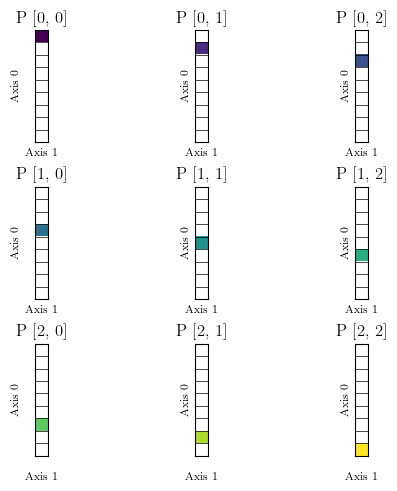

In [8]:
mesh = torch.Size((3, 3))
d = tc.dist.MultiAxisDist(mesh, ((0,1),()), (1,1))
tensor_shape = torch.Size((9,1))

subplot_x = mesh[0]
subplot_y = math.prod(mesh[1:]) if len(mesh) > 1 else 1

fig = plt.figure(layout="constrained")
gs = fig.add_gridspec(nrows=subplot_x, ncols=subplot_y)
axs = gs.subplots(
    sharex=True,
    sharey=True,
)

# print(f"subplot_x: {subplot_x}, subplot_y: {subplot_y}")

for p in range(d.numProcessors):
    p_midx = d.getProcessorMultiIndex(p)

    y_idx = tc.multi2linearIndex(mesh[1:], p_midx[1:]) if len(mesh) > 1 else 0
    # print(f"p_midx: {p_midx}, p: {p}, subplot: {p_midx[0], y_idx}")
    if len(mesh) == 1:
        tc.viz.draw_2d_processor_view(axs[p_midx[0]], tensor_shape, d, p)
    else:
        tc.viz.draw_2d_processor_view(axs[p_midx[0], y_idx], tensor_shape, d, p)

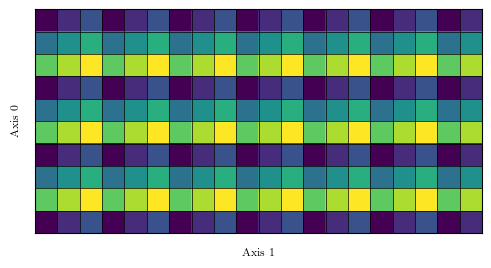

In [9]:
fig = plt.figure(layout="constrained")
d = tc.dist.MultiAxisDist(mesh, ((0,), (1,)), (1, 1))
tensor = torch.Size((10, 20))
tc.viz.draw_2d_tensor(fig.add_subplot(111), tensor, d)

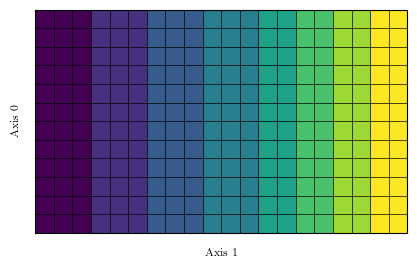

In [10]:
fig = plt.figure()

mesh = (2, 2, 2)
d = tc.dist.SlabDist(mesh, 1, 0)
tensor = torch.Size((12, 20))
tc.viz.draw_2d_tensor(fig.add_subplot(111), tensor, d)

/home/juanpedroghm/code/tensorcraft/tensorcraft/util.py:76: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  order = torch.tensor(order)
/home/juanpedroghm/code/tensorcraft/tensorcraft/util.py:77: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  indices_reorderd = torch.tensor(indices)[order].flip(0)
/home/juanpedroghm/code/tensorcraft/tensorcraft/util.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  dims_reorderd = torch.tensor(dims)[order].flip(0)


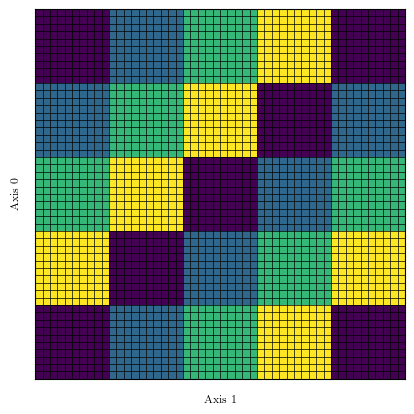

In [11]:
fig = plt.figure()
mesh = (2, 2)
d = tc.dist.TileDist(mesh, 10)
tensor = torch.Size((50, 50))
tc.viz.draw_2d_tensor(fig.add_subplot(111), tensor, d)

torch.Size([9, 9, 9]) torch.Size([9, 9, 9, 4]) torch.Size([9, 9, 9, 4])


/home/juanpedroghm/.pyenv/versions/tensorcraft/lib/python3.10/site-packages/torch/functional.py:513: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3609.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


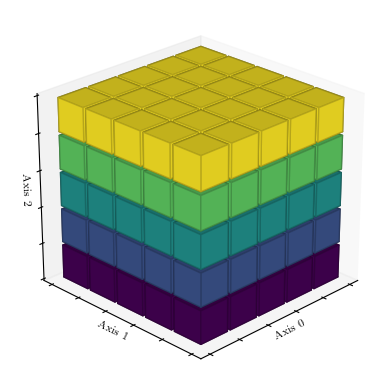

In [12]:
fig = plt.figure()
# dist = tc.dist.TileDist(8, 1)
dist = tc.dist.SlabDist(5, 2)
shape = torch.Size((5, 5, 5))
tc.viz.draw_3d_tensor(fig.add_subplot(111, projection="3d"), shape, dist)

In [13]:
import networkx as nx

mesh = (4, 3)
graph = nx.grid_2d_graph(*mesh)
graph

In [14]:
pos = nx.spring_layout(graph)
pos

{(0, 0): array([0.75040501, 0.63165019]),
 (0, 1): array([0.28222233, 0.83573251]),
 (0, 2): array([-0.20010852,  0.99940502]),
 (1, 0): array([0.59594134, 0.10397994]),
 (1, 1): array([0.10144434, 0.30129824]),
 (1, 2): array([-0.39914204,  0.48729684]),
 (2, 0): array([ 0.39800293, -0.48752728]),
 (2, 1): array([-0.09920531, -0.29987933]),
 (2, 2): array([-0.59517067, -0.10529292]),
 (3, 0): array([ 0.19947, -1.     ]),
 (3, 1): array([-0.28184808, -0.83256545]),
 (3, 2): array([-0.75201133, -0.63409776])}

In [15]:
import numpy as np

shape = (10, 15, 7)

P = 4

tile_dims = np.zeros((len(shape), P))

for i in range(len(shape)):
    chunk = shape[i] // P
    remainder = shape[i] % P
    tile_dims[i] = chunk
    tile_dims[i][:remainder] += 1

tile_ends = np.cumsum(tile_dims[0])
print(tile_ends)
np.where(7 < tile_ends)[0][0]

[ 3.  6.  8. 10.]


np.int64(2)

In [16]:
tile_dims

array([[3., 3., 2., 2.],
       [4., 4., 4., 3.],
       [2., 2., 2., 1.]])